# Import critical libraries

In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

print("All libraries imported successfully!")

All libraries imported successfully!


# Load data set

In [57]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
data = pd.read_csv(url, sep=';')

# explore the data

In [58]:
print(data.info())  
print(data.describe()) 
print(data['quality'].value_counts()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.00000

# Define features X and target Y, Also check for missing values, and binarize target that is classifying into good or bad (Data preprocessing and classification setup)

In [59]:
X = data.drop('quality', axis=1) 
y = data['quality']

print(data.isnull().sum())

y = y.apply(lambda q: 1 if q >= 6 else 0)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


# Prepare the data for training - Split data into training and testing sets (80% train, 20% test). Also Check sizes of train and test sets

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape) 

(1279, 11) (320, 11)


# Train the decision classifier model

In [61]:
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

# Make predictions on the test set then calculate accuracy and classification report

In [62]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.725
              precision    recall  f1-score   support

           0       0.66      0.77      0.71       141
           1       0.79      0.69      0.74       179

    accuracy                           0.72       320
   macro avg       0.73      0.73      0.72       320
weighted avg       0.73      0.72      0.73       320



# Plot the confusion matrix then visualize the decision tree - visualize the model performance

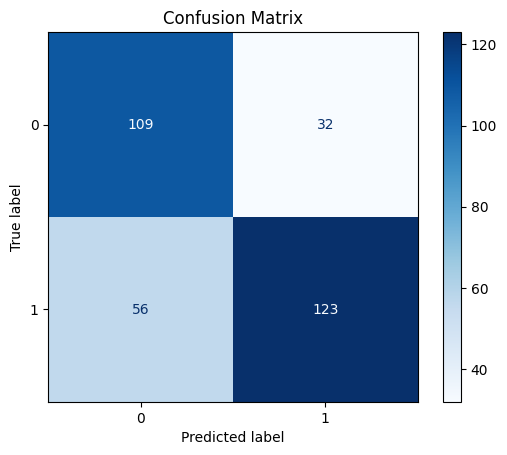

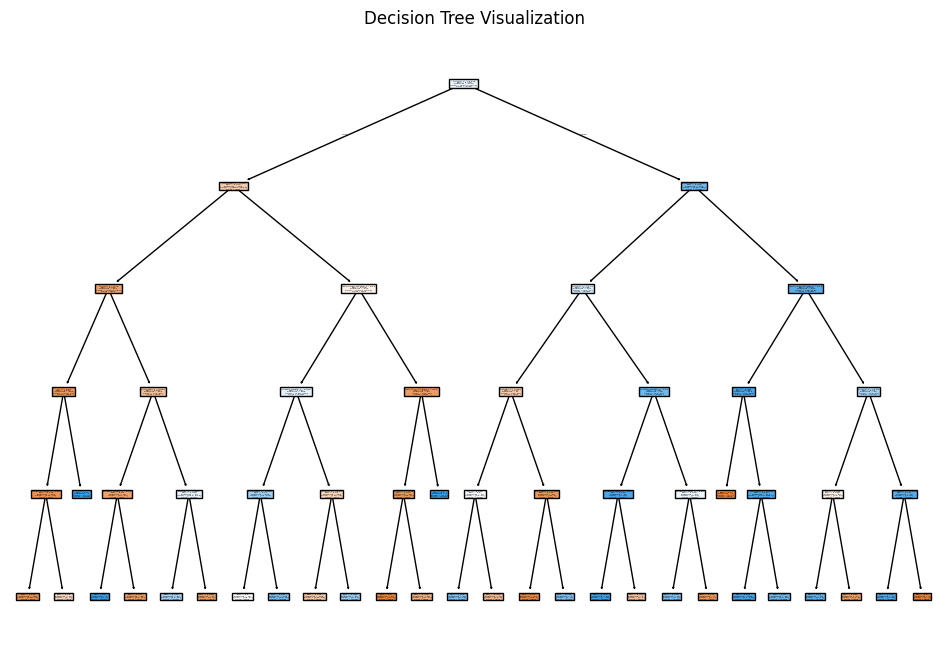

In [63]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

from sklearn.tree import plot_tree
plt.figure(figsize=(12,8))
plot_tree(model, feature_names=X.columns, class_names=['Bad', 'Good'], filled=True)
plt.title('Decision Tree Visualization')
plt.show()

# Hyperparameter tuning - turn the decision tree model to improve the performance

In [64]:
model = DecisionTreeClassifier(max_depth=10, min_samples_split=10, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Tuned Accuracy:", accuracy_score(y_test, y_pred))

Tuned Accuracy: 0.7125


# test what you have improved on. Create a new wine sample like using random values similar to the data set range then predict the new sample

In [65]:
new_data = pd.DataFrame({
    'fixed acidity': [7.2],
    'volatile acidity': [0.60],
    'citric acid': [0.04],
    'residual sugar': [2.0],
    'chlorides': [0.08],
    'free sulfur dioxide': [15],
    'total sulfur dioxide': [45],
    'density': [0.9965],
    'pH': [3.30],
    'sulphates': [0.65],
    'alcohol': [10.5]
})

prediction = model.predict(new_data)
print("Predicted Quality for New Sample:", "Good" if prediction[0] == 1 else "Bad")


Predicted Quality for New Sample: Good
